# Project Title: FraudGuard ML

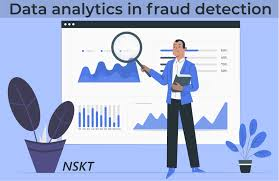

Team Members:<br>
Michelle Silver supersilver1978@gmail.com<br>
Alex Valenzuela axvalenzuela@gmail.com<br>
Dylan Johnston - dylanhjjohnston@gmail.com<br>
Rosalinda Olvera - rolvera98271@gmail.com<br>
James White - jswhite1992@gmail.com<br>
1. Data Scientist: Responsible for data preprocessing, exploratory data analysis, feature selection, and model building.<br>
2. Machine Learning Engineer: Works closely with the data scientist in model building, model evaluation, and integrating the model with the API.<br>
3. Back-End Developer: Responsible for setting up and maintaining the Flask API and its integration with the ML model.<br>
4. Project Manager: Oversees the project's progress, facilitates communication among team members, and ensures that the project is on track and within budget.<br>
5. QA Tester/Technical Writer: Handles testing of the machine learning model and the Flask API, and prepares comprehensive project documentation.

# Project Description/Outline:<br>
FraudGuard ML aims to enhance the security of online transactions by leveraging machine learning to identify potentially fraudulent credit card transactions. The project combines data analytics and predictive modeling techniques to stay effective in the ever-evolving landscape of online transactions.
The application is built using Python, incorporating libraries such as Scikit-learn for machine learning, and Flask for creating a web-based API. The model is trained on a dataset rich with both fraudulent and non-fraudulent transactional data, learning from the trends and patterns to flag potential fraud.

# Research Questions to Answer:<br>
1. What are the most significant indicators of a fraudulent transaction?<br>
2. How can machine learning improve the accuracy of fraud detection in comparison to traditional methods?<br>
3. How can the model be updated regularly to adapt to new fraud patterns?<br>
4. How can the model accuracy be maintained despite the imbalance of fraudulent to non-fraudulent transactions in the dataset?<br>
# Datasets to be Used:<br>
The datasets to be used will consist of anonymized credit card transactions. These datasets will have a mix of fraudulent and non-fraudulent transactions, making it possible for the model to learn and distinguish between them.
# Rough Breakdown of Tasks:<br>
1. Data Acquisition and Understanding: Gather the required dataset and understand the variables. (Data Scientist)<br>
2. Exploratory Data Analysis (EDA) and Preprocessing: Perform EDA, clean the data, manage missing values and outliers, and handle class imbalance. (Data Scientist)<br>
3. Flask API Structure: Set up the basic structure of the Flask API. (Back-End Developer)<br>
4. Feature Selection and Engineering: Determine the most relevant features for the machine learning model. (Data Scientist and Machine Learning Engineer)<br>
5. Model Building and Evaluation: Build, train, and evaluate the machine learning model. (Data Scientist and Machine Learning Engineer)<br>
6. Flask API and Model Integration: Integrate the machine learning model with the Flask API. (Back-End Developer and Machine Learning Engineer)<br>
7. Testing and Documentation: Test all parts of the project and complete the project documentation. (QA Tester/Technical Writer and Project Manager)<br>

# Perform Exploratory Data Analysis (EDA)

### Import the Libraries

In [1]:
# Importing libraries
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Shows all the columns

pd.set_option('display.max_columns',None)

In [3]:
# Set the float values to decimal points

pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Read the data from the CSV file into a Pandas DataFrame and review the DataFrame.

In [4]:
# Read the fraudTrainlarge.csv file from the Resources folder into a Pandas DataFrame

fraud_df = pd.read_csv(
    Path("./Resources/fraudTrainlarge.csv"))

fraud_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0


In [5]:
# EDA (6 steps):
# discovering : what columns are relevant, datatypes, data descrepancies.
# joining : more than two table.
# cleaning : removing decsrepancies.
# validating : validate for errors in the data.
# structuring : start_date, end_date -- > start_date - end_date = duration (feature engineering).
# presenting : example :'merchant', y do you feel that this column needs to be added. 10% > null values : dropna() , 15% < null values : drop(columns='')

### Discover the Relevant Columns, Data Types and Descrepancies

In [6]:
# Check the data information 

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
# Changing the data types for all the columns

fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])
fraud_df['merchant'] = fraud_df['merchant'].astype(str)
fraud_df['category'] = fraud_df['category'].astype(str)
fraud_df['first'] = fraud_df['first'].astype(str)
fraud_df['last'] = fraud_df['last'].astype(str)
fraud_df['gender'] = fraud_df['gender'].astype(str)
fraud_df['street'] = fraud_df['street'].astype(str)
fraud_df['city'] = fraud_df['city'].astype(str)
fraud_df['state'] = fraud_df['state'].astype(str)
fraud_df['job'] = fraud_df['job'].astype(str)
fraud_df['dob'] = pd.to_datetime(fraud_df['dob'])




In [8]:
# Rechecking the data types 

fraud_df.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [9]:
# Check for duplicate rows

fraud_df.duplicated().sum()

0

In [10]:
# Obtaining total for null values

fraud_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
# Calculate the non-fraud transactions, fraud transactions and percentage of fraud transactions

non_fraud = len(fraud_df[fraud_df.is_fraud == 0])
fraud = len(fraud_df[fraud_df.is_fraud == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Non-Fraud transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Non-Fraud transactions:  1289169
Number of Fraud transactions:  7506
Percentage of Fraud transactions: 0.5789


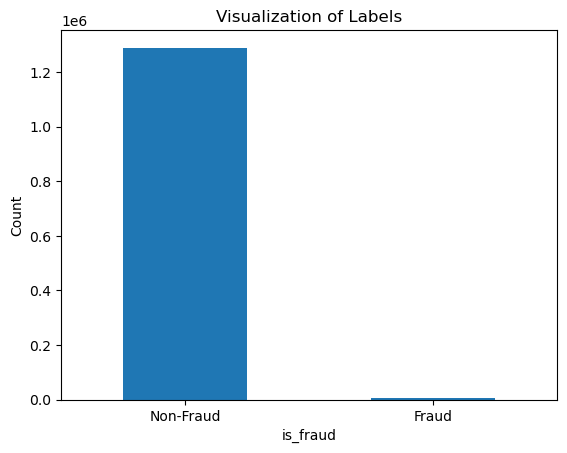

In [12]:
# Visualize the "Labels" column in our dataset

labels = ["Non-Fraud", "Fraud"]
count_classes = fraud_df.value_counts(fraud_df['is_fraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [13]:
# Generate summary statistics

fraud_df.describe().apply(lambda x: x.apply('{0:.2f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1296675.00,648337.00,374317.97,0.00,324168.50,648337.00,972505.50,1296674.00
cc_num,1296675.00,417192042079641088.00,1308806447000789248.00,60416207185.00,180042946491150.00,3521417320836166.00,4642255475285942.00,4992346398065154048.00
amt,1296675.00,70.35,160.32,1.00,9.65,47.52,83.14,28948.90
zip,1296675.00,48800.67,26893.22,1257.00,26237.00,48174.00,72042.00,99783.00
lat,1296675.00,38.54,5.08,20.03,34.62,39.35,41.94,66.69
long,1296675.00,-90.23,13.76,-165.67,-96.80,-87.48,-80.16,-67.95
city_pop,1296675.00,88824.44,301956.36,23.00,743.00,2456.00,20328.00,2906700.00
unix_time,1296675.00,1349243636.73,12841278.42,1325376018.00,1338750742.50,1349249747.00,1359385375.50,1371816817.00
merch_lat,1296675.00,38.54,5.11,19.03,34.73,39.37,41.96,67.51
merch_long,1296675.00,-90.23,13.77,-166.67,-96.90,-87.44,-80.24,-66.95


In [14]:
# Checking the unique values for all the columns

fraud_df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [15]:
# Function to return categorical columns to unique values and append to categorical_col

def unique_values(data):
  

    categorical_col = []
    for i,x in fraud_df.dtypes.items():
        if x == 'object':
            categorical_col.append(i)
    return(categorical_col)
    
        

In [16]:
# Check for unique values for all the categorical columns

cat_cols = unique_values(fraud_df)

In [17]:
# List all the categorical columns

cat_cols

['merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'trans_num']

In [18]:
# For loop to get categorical columns and value counts

df_dict = {}
for i in cat_cols:
    df_dict[i] = len(fraud_df[i].value_counts())

In [19]:
# Check the total number of unique values in the categorical columns

df_dict

{'merchant': 693,
 'category': 14,
 'first': 352,
 'last': 481,
 'gender': 2,
 'street': 983,
 'city': 894,
 'state': 51,
 'job': 494,
 'trans_num': 1296675}

In [20]:
# Using boolean mask as an alternate way to seperate out the categorical and numerical columns

# Categorical columns
cat_col = [col for col in fraud_df.columns if fraud_df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in fraud_df.columns if fraud_df[col].dtype != 'object']
print('Numerical columns :',num_col)


Categorical columns : ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'trans_num']
Numerical columns : ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


#### Presenting the Heat Map and Box Plot

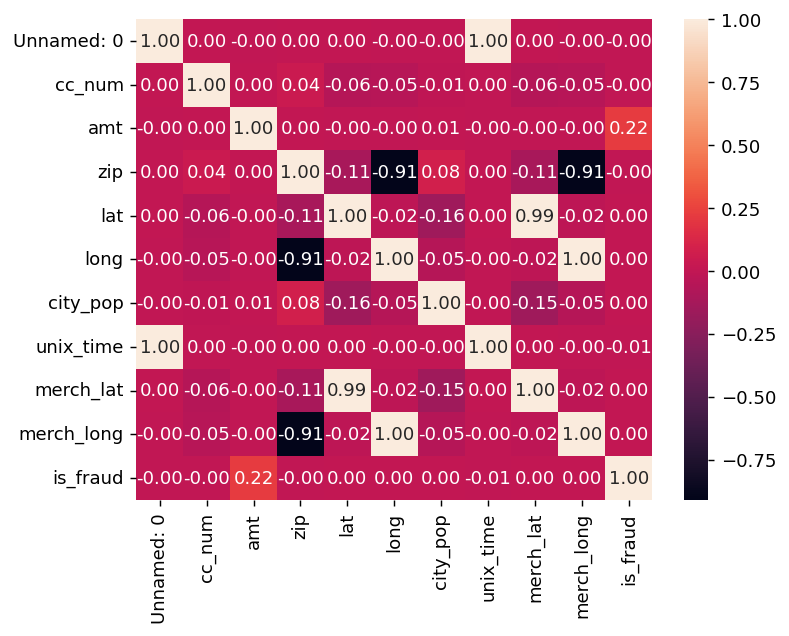

In [21]:
# Correlation of numberical columns

corr = fraud_df.corr()

plt.figure(dpi=130)
sns.heatmap(fraud_df.corr(), annot=True, fmt= '.2f')
plt.show()


In [22]:
# Sorting all the correlated values

corr['is_fraud'].sort_values(ascending = False)


is_fraud      1.00
amt           0.22
city_pop      0.00
lat           0.00
merch_lat     0.00
merch_long    0.00
long          0.00
cc_num       -0.00
zip          -0.00
Unnamed: 0   -0.00
unix_time    -0.01
Name: is_fraud, dtype: float64

<AxesSubplot:>

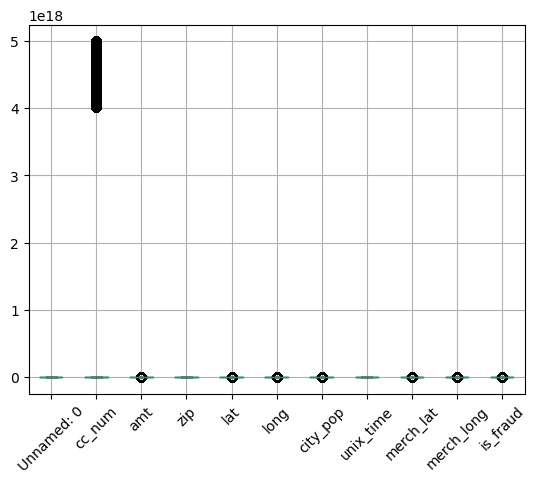

In [23]:


fraud_df.boxplot(rot =45)

In [24]:
# Total amount of columns

len(fraud_df.columns)

23

In [25]:
# Container for columns for box plots

cols = ['cc_num','amt','city_pop']

In [26]:
# Enumerate all the columns for th box plots

for i in enumerate(cols):
    print(i)

(0, 'cc_num')
(1, 'amt')
(2, 'city_pop')


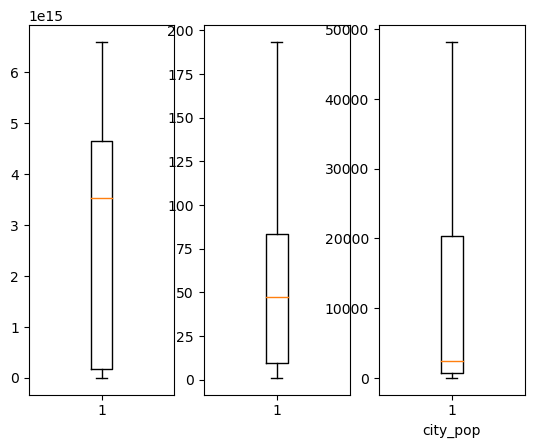

In [27]:
# Each box plot for the enumerated columns 

fig,axs = plt.subplots(nrows=1, ncols=3)
axs.flatten()
for i,x in enumerate(cols):
    axs[i].boxplot(fraud_df[x],showfliers =False)
    plt.xlabel(x)
plt.show()

<AxesSubplot:>

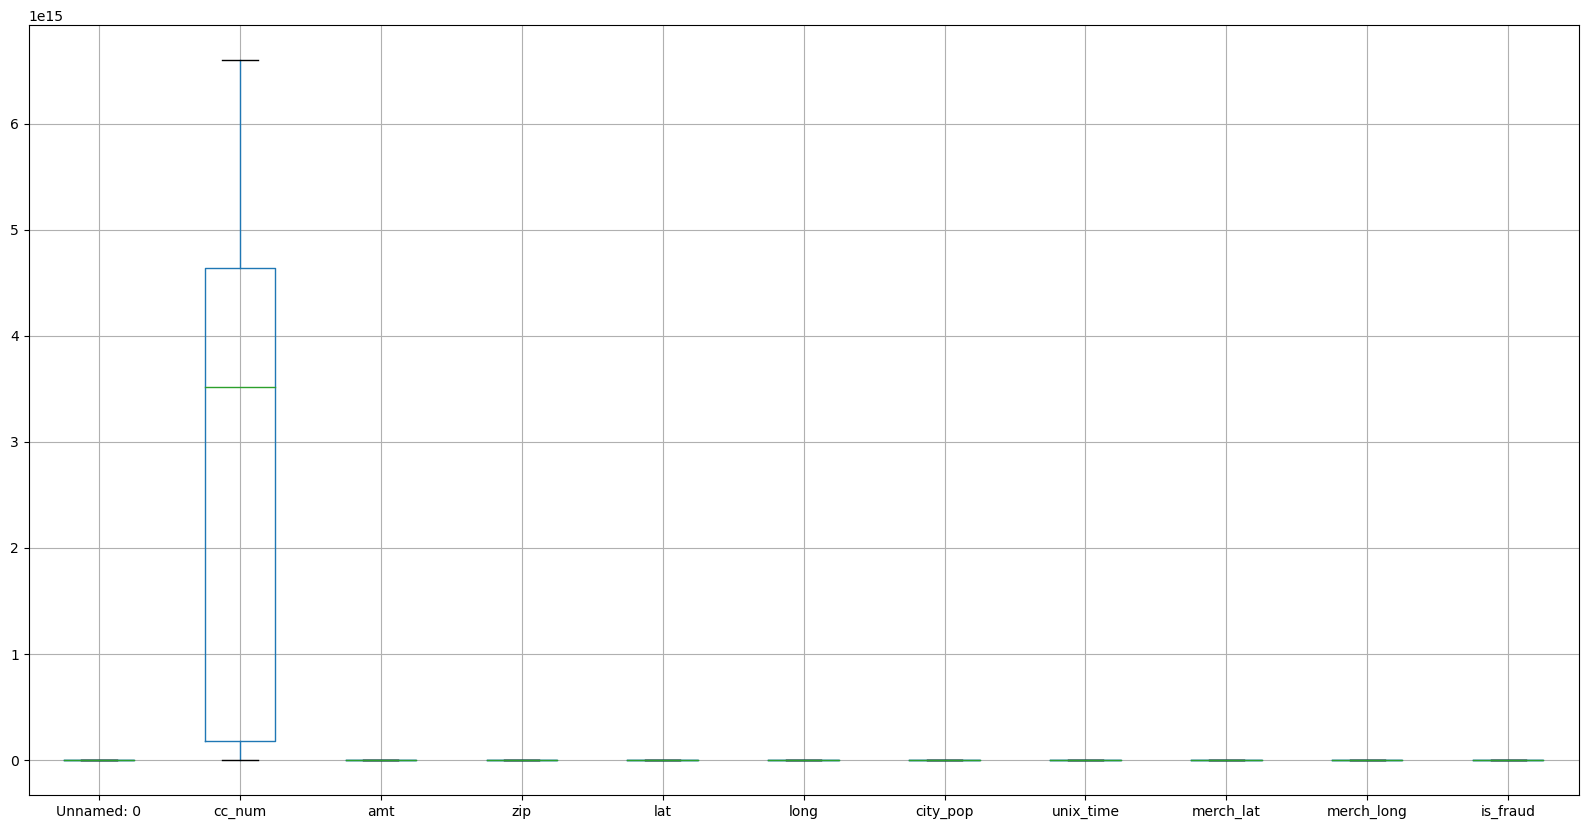

In [28]:
# Using box plot to visualize the outliers

fraud_df.boxplot(figsize=(20,10),showfliers = False)

# Data Preprocessing

### Import the necessary libraries

In [29]:
# Import the required modules
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
# import warnings
# warnings.filterwarnings("ignore")  # Ignore all warnings

# Prepare the Data

### Step 1: Load the `fraudTrainlarge.csv` file from the Resources folder into a Pandas DataFrame. Set the `id` column as the index.

In [30]:
# Define a function to convert values to float or Nan 
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return np.nan
    
# Convert 'trans_date_trans_time' to datetime data type
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])

# Convert 'amt' column to numeric, handling non-numeric values as NaN
fraud_df['amt'] = pd.to_numeric(fraud_df['amt'], errors='coerce')

# Drop rows with NaN values in 'amt' column
fraud_df = fraud_df.dropna(subset=['amt']) 

# Reset the index
fraud_df.reset_index(drop=True, inplace=True)

# Extract UNIX timestamp as a float
fraud_df['trans_date_trans_time'] = fraud_df['trans_date_trans_time'].astype(int) / 10**9

# Rename the 'Unnamed: 0' column to 'id'
fraud_df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

fraud_df = fraud_df.drop(columns=['merchant','category', 'first', 'last', 'gender', 'job', 'city', 'state', 'street', 'dob', 'trans_num'])

# Set the 'id' column as the index
fraud_df.set_index('id', inplace=True)


# Review the DataFrame
fraud_df.head()

/Users/alexvalenzuela/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.


,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
id,,,,,,,,,,,
0,1546300818.00,2703186189652095,4.97,28654,36.08,-81.18,3495,1325376018,36.01,-82.05,0
1,1546300844.00,630423337322,107.23,99160,48.89,-118.21,149,1325376044,49.16,-118.19,0
2,1546300851.00,38859492057661,220.11,83252,42.18,-112.26,4154,1325376051,43.15,-112.15,0
3,1546300876.00,3534093764340240,45.00,59632,46.23,-112.11,1939,1325376076,47.03,-112.56,0
4,1546300986.00,375534208663984,41.96,24433,38.42,-79.46,99,1325376186,38.67,-78.63,0


### Show all the columns of `fraud_df`

In [31]:
fraud_df.columns

Index(['trans_date_trans_time', 'cc_num', 'amt', 'zip', 'lat', 'long',
       'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

### Step 2: Using `value_counts` to get the total fraudulent transactions in this dataset


In [32]:
# The  column 'fraud' is the thing you want to predict. 
# Class 0 indicates no-fraud trasactions and class 1 indicates fraudulent transactions

fraud_df["is_fraud"].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

# Split the data into training and testing sets

### Step 1: Using the transaction_fraud_data DataFrame, separate the data into training and testing data. Start by defining the target (the “fraud” column) and the features of the data (all the columns except “fraud”).

In [33]:
# The target column should be the binary `fraud` column.
target = fraud_df["is_fraud"]


# The features column should be all of the features. 
features = fraud_df.drop(columns="is_fraud")

### Step 2: Split the features and target data into `training_features`, `testing_features`, `training_targets`, and `testing_targets` datasets by using the train_test_split function.

In [34]:
# Split the dataset using the train_test_split function
training_features, testing_features, training_targets, testing_targets = train_test_split(features, target, test_size= 0.3, random_state= 42)

print("Shape of training_features: ", training_features.shape)
print("Shape of testing_features: ", testing_features.shape)

Shape of training_features:  (907672, 10)
Shape of testing_features:  (389003, 10)


### Step 3: Scale the features data using the StandardScaler from sklearn

In [35]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [36]:
# Scale both the training and testing data from the features dataset

scaler.fit(training_features)

StandardScaler()

### Transform your test data using the same scaler

In [37]:
# Scale both the training and testing data from the features dataset

train_scaled = scaler.transform(training_features)
test_scaled = scaler.transform(testing_features)

# Model and Fit the Data to a Logistic Regression

### Step 1: Declare a LogisticRegression model.

In [38]:
# Declare a logistic regression model.
# Apply a random_state of 7 to the model
logistic_regression_model = LogisticRegression(random_state=7)

### Step 2: Fit the training data to the model, and save the model.


In [39]:
# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(training_features, training_targets)

/Users/alexvalenzuela/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Predict the Testing Labels

In [40]:
# Make and save testing predictions with the saved logistic regression model using the test data
testing_predictions = lr_model.predict(testing_features)

# Review the predictions
#testing_predictions
# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions,
    "Testing Data Actual Targets": testing_targets})
results_df

,Testing Data Predictions,Testing Data Actual Targets
id,,
1045211,0,0
547406,0,0
110142,0,0
1285953,0,0
271705,0,0
...,...,...
421133,0,0
695406,0,0
1259079,0,0


### Length of predictions for `testing_features`

In [41]:
len(testing_predictions)

389003

# Calculate the Performance Metrics

### Step 1: Calculate the accuracy score by evaluating `testing_targets` vs. `testing_predictions`.

In [42]:
# Display the accuracy score for the test dataset.
accuracy_score(testing_targets, testing_predictions)

0.9941260093109822

### Step 2: Evaluate the Model with a Confusion Matrix

In [43]:
#Generate training predictions
training_predictions = lr_model.predict(training_features)

In [44]:
#Print the confusion matrix
training_matrix = confusion_matrix(training_targets, training_predictions)
print(training_matrix)

[[902451      0]
 [  5221      0]]


### Step 3: Generate a Classification Report

In [45]:
# Save a classification report
training_report = classification_report(training_targets, training_predictions)
# Then view its output
# Save the confusion matrix for the test labels
testing_matrix = confusion_matrix(testing_targets, testing_predictions)
print(training_report)

/Users/alexvalenzuela/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    902451
           1       0.00      0.00      0.00      5221

    accuracy                           0.99    907672
   macro avg       0.50      0.50      0.50    907672
weighted avg       0.99      0.99      0.99    907672



/Users/alexvalenzuela/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexvalenzuela/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# Save the confusion matrix for the test labels
testing_matrix = confusion_matrix(testing_targets, testing_predictions)

# Save the classification report for the test labels
testing_report = classification_report(testing_targets, testing_predictions)
# View the output
print(testing_matrix)
print(testing_report)

[[386718      0]
 [  2285      0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386718
           1       0.00      0.00      0.00      2285

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003



/Users/alexvalenzuela/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexvalenzuela/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexvalenzuela/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,